# **Input Utils**

getting data set from google drive and unzipping

In [ ]:
!pip install gdown

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import gdown
gdown.download('https://drive.google.com/uc?id=1JLxhdIddq6_vKlHml7jT48VaeXoJjvpR', 'dataset.zip', quiet=False)

Downloading...
From: https://drive.google.com/uc?id=1JLxhdIddq6_vKlHml7jT48VaeXoJjvpR
To: /content/dataset.zip
100%|██████████| 6.52G/6.52G [01:06<00:00, 97.3MB/s]


'dataset.zip'

In [ ]:
import zipfile
zip_ref = zipfile.ZipFile("/content/dataset.zip", 'r')
zip_ref.extractall("dataset")
zip_ref.close()

In [ ]:
!rm dataset.zip

In [ ]:
import pandas as pd
import numpy as np
import cv2 as cv
from glob import glob
import matplotlib.pyplot as plt
%matplotlib inline
import os
import shutil
# shutil.rmtree('/content/dataset')


making sure all images have the same extension

In [ ]:
dataset_path = '/content/dataset'
# Loop over the women and men folders
for gender in ['Women', 'men']:
    gender_path = os.path.join(dataset_path, gender)
    for i in range(6):
        folder_path = os.path.join(gender_path, str(i))
        # Loop over the files in the folder
        extensions = set()
        for filename in os.listdir(folder_path):
            if os.path.isfile(os.path.join(folder_path, filename)):
                file_extension = os.path.splitext(filename)[1]
                if file_extension not in ['.JPG']:
                    print(f'Error: {filename} has an invalid extension ({file_extension})')
                    os.remove(os.path.join(folder_path, filename))
                extensions.add(file_extension)
        # Check that all files have the same extension
        if (len(extensions) == 0):
            print('All files have the same extension')


Error: desktop.ini has an invalid extension (.ini)
Error: desktop.ini has an invalid extension (.ini)
Error: desktop.ini has an invalid extension (.ini)
Error: desktop.ini has an invalid extension (.ini)
Error: desktop.ini has an invalid extension (.ini)
Error: desktop.ini has an invalid extension (.ini)
Error: desktop.ini has an invalid extension (.ini)
Error: desktop.ini has an invalid extension (.ini)
Error: desktop.ini has an invalid extension (.ini)
Error: desktop.ini has an invalid extension (.ini)
Error: desktop.ini has an invalid extension (.ini)
Error: desktop.ini has an invalid extension (.ini)


read data function

In [ ]:
import os
women_dataset = '/content/dataset/Women'
men_dataset = '/content/dataset/men'
from PIL import Image, ImageFilter

dataset = []
# dataset_labels = []
classes_sizes=[]
corrupted=0
corrupted_imgs=[]
for i in range(6):
  women_folder_path = os.path.join(women_dataset, str(i))
  men_folder_path = os.path.join(men_dataset, str(i))
  # Get the file paths in the folders
  women_files = [os.path.join(women_folder_path, f) for f in os.listdir(women_folder_path) if os.path.isfile(os.path.join(women_folder_path, f))]
  men_files = [os.path.join(men_folder_path, f) for f in os.listdir(men_folder_path) if os.path.isfile(os.path.join(men_folder_path, f))]

  imgs = women_files + men_files
  for img in imgs:
    try:
        temp = Image.open(img)
    except (IOError, SyntaxError) as e:   # in case of corrupted images
        print('Bad file:', temp)
        corrupted+=1
        continue 
    path = img.split('/')
    dataset.append(img)
    
  classes_sizes.append(len(imgs))
print("Total number of images = ", len(dataset))

Bad file: <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4608x2592 at 0x7FD56455BBE0>
Bad file: <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4608x2592 at 0x7FD56455BBE0>
Bad file: <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4608x2592 at 0x7FD564407EB0>
Bad file: <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4608x2592 at 0x7FD564407400>
Bad file: <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4608x2592 at 0x7FD5643EAD70>
Bad file: <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4608x2592 at 0x7FD56440BFD0>
Total number of images =  1821


In [ ]:
import copy
import random

random.seed(42)
random.shuffle(dataset)
dataset_labels = []
for img in dataset:
  path=img.split('/')
  dataset_labels.append(path[4])

In [ ]:
from sklearn.model_selection import train_test_split

train_imgs, test_imgs, train_labels, test_labels = train_test_split(dataset, dataset_labels, test_size=0.2, random_state=42)

train_imgs, validation_imgs, train_labels, validation_labels = train_test_split(train_imgs, train_labels, test_size=0.1, random_state=42)

print(len(train_imgs), len(validation_imgs), len(test_imgs))

# check
total = len(train_imgs) + len(validation_imgs) + len(test_imgs)
print(total == len(dataset))


1310 146 365
True


In [ ]:
# print(train_labels)
print(sum(train_labels[i] == '0' for i in range(len(train_labels))))
print(sum(train_labels[i] == '1' for i in range(len(train_labels))))
print(sum(train_labels[i] == '2' for i in range(len(train_labels))))
print(sum(train_labels[i] == '3' for i in range(len(train_labels))))
print(sum(train_labels[i] == '4' for i in range(len(train_labels))))
print(sum(train_labels[i] == '5' for i in range(len(train_labels))))

204
214
232
222
213
225


# **Preprocessing Module**

**Notes:**
open => erosion then dialation
closing => dialation then ersosion

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!cp dataset /content/drive/MyDrive/Pattern -r

trial failed

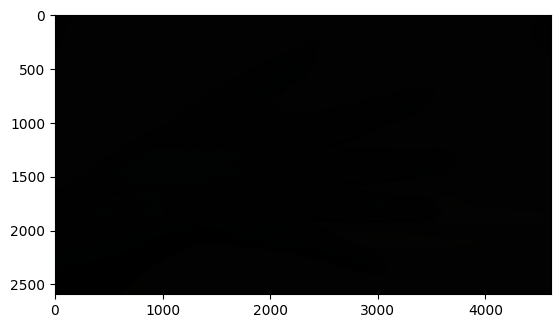

In [ ]:
# from sklearn.preprocessing import normalize

# X = cv.imread(train_imgs[0])
# # Reshape the images into a flat vector representation
# X_flat = X.reshape(X.shape[0], -1)

# # Normalize the image vectors
# normalized_X = normalize(X_flat, norm='l2', axis=1)

# # Reshape the normalized vectors back into the original image shape
# normalized_X = normalized_X.reshape(X.shape)
# # print(normalized_X)

# np.save('data.npy', normalized_X)

# # Load the NumPy array from the binary file
# image_array = np.load('data.npy')

# # Save the image array as a file
# # cv.imwrite('image.JPG', image_array)
# plt.imshow(image_array)


In [ ]:
# # A common skin color threshold in the YCbCr space is 85 <= Cr <= 135 and 135 <= Cb <= 180.

# img_ycrcb = cv.cvtColor(resized_img, cv.COLOR_BGR2YCrCb)
# cv.imwrite('intermediate.JPG', img_ycrcb)
# lower_skin = np.array([0, 135, 85])
# upper_skin = np.array([255, 180, 135])
# # Create a binary mask of the skin color in the YCrCb color space according to a range of pixels
# mask = cv.inRange(img_ycrcb, lower_skin, upper_skin)

# kernel = cv.getStructuringElement(cv.MORPH_ELLIPSE, (5, 5))
# mask = cv.morphologyEx(mask, cv.MORPH_OPEN, kernel)


# contours, hierarchy = cv.findContours(mask, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)
# contour_sizes = [(cv.contourArea(contour), contour) for contour in contours]
# hand_contour = max(contour_sizes, key=lambda x: x[0])[1]

# # Extract the hand region
# x, y, w, h = cv.boundingRect(hand_contour)
# # print(x, y, w, h)
# hand_region = equalized_img[y:y+h, x:x+w]
# mask = mask[y:y+h, x:x+w]
# cv.imwrite('mask.JPG', mask)
# # Display the hand region
# cv.imwrite('equalized_image_contour.JPG', hand_region)


True

In [ ]:
# subtracted = cv.bitwise_and(hand_region, hand_region)
# cv.imwrite('subtracted.JPG', subtracted)

# # Apply Canny edge detection
# edges = cv.Canny(subtracted, 20, 270)

# # Display the original image and the edges
# cv.imwrite('edges.JPG', edges)

True

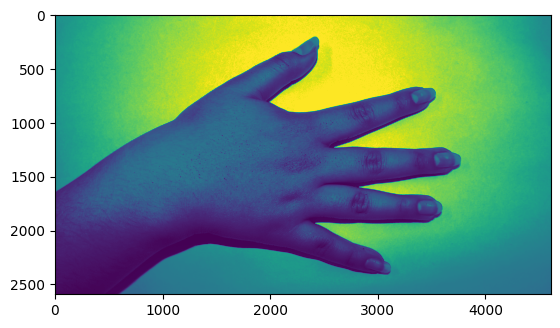

In [ ]:
# import cv2 as cv

# # Load an image in BGR color space
# img_bgr = cv.imread(train_imgs[0])

# # Convert the image to grayscale
# img_gray = cv.cvtColor(img_bgr, cv.COLOR_BGR2GRAY)

# # Apply a Gaussian blur
# img_blur = cv.GaussianBlur(img_gray, (5, 5), 0)

# # Calculate the image gradient using the Sobel operator
# grad_x = cv.Sobel(img_blur, cv.CV_32F, 1, 0, ksize=3)
# grad_y = cv.Sobel(img_blur, cv.CV_32F, 0, 1, ksize=3)
# gradient = cv.subtract(grad_x, grad_y)
# gradient = cv.convertScaleAbs(gradient)


# # Apply a threshold to the gradient image
# _, binary_mask = cv.threshold(gradient, 0, 255, cv.THRESH_BINARY+cv.THRESH_OTSU)


# # Apply a morphological closing operation to the binary mask
# kernel = cv.getStructuringElement(cv.MORPH_ELLIPSE, (5, 5))
# binary_mask = cv.morphologyEx(binary_mask, cv.MORPH_CLOSE, kernel)


# # Multiply the original image with the inverse of the binary mask
# shadow_free = cv.bitwise_and(img_bgr, img_bgr, mask=cv.bitwise_not(binary_mask))

# # Apply a contrast enhancement algorithm to the shadow-free image
# shadow_free = cv.equalizeHist(cv.cvtColor(shadow_free, cv.COLOR_BGR2GRAY))

# # Display the result
# # cv.imwrite('Shadow-free.JPG', shadow_free)
# plt.imshow(shadow_free)
# # plt.imshow(img_bgr)

Background Subtraction

a) without skin extraction

In [ ]:
# # Apply Gaussian blur to reduce noise
# blur = cv.GaussianBlur(edges, (11,11), 0)
# cv.imwrite('blur.JPG', blur)
# # Compute the background by taking the minimum pixel value over a sliding window
# min_bg = cv.erode(blur, None, iterations=3)
# max_bg = cv.dilate(min_bg, None, iterations=3)
# # cv.imwrite('max_bg.JPG', max_bg)
# bg = cv.min(min_bg, max_bg)
# cv.imrite('')
# # Compute the foreground mask by thresholding the difference between the image and the background
# # diff = cv.absdiff(bg, blur)
# # _, fgmask = cv.threshold(diff, 50, 255, cv.THRESH_BINARY + cv.THRESH_OTSU)

# # Display the original image and the foreground mask
# # cv.imwrite('Foreground.JPG', fgmask)

True

b) with skin extraction

In [ ]:
# import cv2
# import numpy as np

# # Load an image

# # Convert the image to HSV color space
# hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
# cv.imwrite('HSV.JPG', hsv)

# # Define the range of skin color in HSV
# lower_skin = np.array([0, 20, 70], dtype=np.uint8)
# upper_skin = np.array([20, 255, 255], dtype=np.uint8)

# # Extract the skin color using the range of skin color
# mask = cv2.inRange(hsv, lower_skin, upper_skin)
# cv.imwrite('mask.JPG', mask)

# # Apply Gaussian blur to reduce noise
# blur = cv2.GaussianBlur(mask, (5, 5), 0)

# # Compute the background by taking the minimum pixel value over a sliding window
# min_bg = cv2.erode(blur, None, iterations=3)
# max_bg = cv2.dilate(blur, None, iterations=3)
# bg = cv2.min(min_bg, max_bg)

# # Compute the foreground mask by thresholding the difference between the image and the background
# diff = cv2.absdiff(bg, blur)
# _, fgmask = cv2.threshold(diff, 50, 255, cv2.THRESH_BINARY)

# # Display the original image and the foreground mask
# cv2.imwrite('Original(2).JPG', img)
# cv2.imwrite('Foreground mask.JPG', fgmask)

True

In [ ]:


# Merge the equalized color channels back into a single image
# equalized_img = cv.merge((b_eq, g_eq, r_eq))

# # Display the equalized image
# cv.imwrite('equalized_colored.JPG', equalized_img)

# _, mask_skin = cv.threshold(equalized_img, 0, 255, cv.THRESH_BINARY + cv.THRESH_OTSU)
# cv.imwrite('mask_skin.JPG', mask_skin)
# kernel = cv.getStructuringElement(cv.MORPH_ELLIPSE, (5, 5))
# mask_skin = cv.morphologyEx(mask_skin, cv.MORPH_OPEN, kernel)
# mask_skin = cv.morphologyEx(mask_skin, cv.MORPH_CLOSE, kernel)

# img_skin = cv.bitwise_and(equalized_img, equalized_img, mask=mask_skin)
# cv.imwrite('img_skin_bitwise.JPG', img_skin)
# 2) skin extraction

## A common skin color threshold in the YCbCr space is 85 <= Cr <= 135 and 135 <= Cb <= 180.
# img_ycrcb = cv.cvtColor(equalized_img, cv.COLOR_BGR2YCrCb)
# cv.imwrite('imageYCrCb.JPG', img_ycrcb)

# lower_skin = np.array([0, 135, 85])
# upper_skin = np.array([255, 180, 135])
# lower_skin = np.array([0, 135, 77], dtype=np.uint8)
# upper_skin = np.array([255, 173, 127], dtype=np.uint8)
# # Create a binary mask of the skin color in the YCrCb color space according to a range of pixels
# skin_extracted_image = cv.inRange(img_ycrcb, lower_skin, upper_skin)
# cv.imwrite('skin_extracted.JPG', skin_extracted_image)


# kernel = cv.getStructuringElement(cv.MORPH_ELLIPSE, (5, 5))
# mask_skin = cv.morphologyEx(skin_extracted_image, cv.MORPH_OPEN, kernel)
# mask_skin = cv.morphologyEx(skin_extracted_image, cv.MORPH_CLOSE, kernel)


# img_skin = cv.bitwise_and(skin_extracted_image, skin_extracted_image, mask=mask_skin)
# cv.imwrite('img_skin_bitwise.JPG', img_skin)

# # 4) Morphological Processing
# kernel = cv.getStructuringElement(cv.MORPH_ELLIPSE, (5, 5))
# closed_edges = cv.morphologyEx(skin_extracted_image, cv.MORPH_CLOSE, kernel)
# cv.imwrite('closed_edges.JPG', closed_edges)

# # 5) Binarization
# # ret, thresh = cv.threshold(closed_edges, 0, 255, cv.THRESH_BINARY)  # binarization

# # 6) Edge Detection using Canny
# # subtracted = cv.bitwise_and(closed_edges, resized_img, mask = thresh)

# 7) contouring 
# cv.imwrite('thresh.JPG', thresh)
# contours, hierarchy = cv.findContours(edges, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)
# contour_sizes = [(cv.contourArea(contour), contour) for contour in contours]
# hand_contour = max(contour_sizes, key=lambda x: x[0])[1]

# # Extract the hand region
# x, y, w, h = cv.boundingRect(hand_contour)
# # print(x, y, w, h)
# hand_region = edges[y:y+h, x:x+w]
# cv.imwrite('hand_region.JPG', hand_region)

# mask = mask[y:y+h, x:x+w]

# cv.imwrite('mask.JPG', mask)
# Display the hand region
# cv.imwrite('equalized_image_contour.JPG', hand_region)

# axs[idx, 0].imshow(img)
# axs[idx, 1].imshow(edges)
# cv.imwrite('edges.JPG', edges)

# b, g, r = cv.split(resized_img)

# # Perform histogram equalization on each color channel
# b_eq = cv.equalizeHist(b)
# g_eq = cv.equalizeHist(g)
# r_eq = cv.equalizeHist(r)
def preprocessing(img):
    height = 260
    width = 460
    img_name = img
    img = cv.imread(img)
    resized_img = cv.resize(img, (width,height), interpolation = cv.INTER_LINEAR)
    cv.imwrite('resized.JPG', resized_img)

    gray_scale = cv.cvtColor(resized_img, cv.COLOR_BGR2GRAY)
    cv.imwrite('grayscale.JPG', gray_scale)
    # equalized_img = cv.equalizeHist(gray_scale) #illumination removal
    # cv.imwrite('equalized.JPG', equalized_img)

    edges = cv.Canny(gray_scale, 50, 600)
    ret, thresh = cv.threshold(edges, 150, 255, cv.THRESH_BINARY)
    cv.imwrite(f'/content/train_imgs_processed/{img_name}', thresh)
    
    return thresh

processed_imgs = []
for img in train_imgs:
    processed_imgs.append(preprocessing(img))


!zip -r train_imgs_processed.zip train_imgs_processed


updating: train_imgs_processed/ (stored 0%)


In [ ]:
height = 260
width = 460
num = random.randint(1, len(dataset)+1)
print(num)
img = dataset[num]
print(img)
img = cv.imread(img)
resized_img = cv.resize(img, (width,height), interpolation = cv.INTER_LINEAR)
cv.imwrite('resized.JPG', resized_img)

gray_scale = cv.cvtColor(resized_img, cv.COLOR_BGR2GRAY)
cv.imwrite('grayscale.JPG', gray_scale)

# edges = cv.Canny(gray_scale, 50, 600)
# ret, thresh = cv.threshold(gray_scale, 127, 255, cv.THRESH_BINARY+cv.THRESH_OTSU)


cv.imwrite('thresh.JPG',gray_scale)

1223
/content/dataset/Women/2/2_woman (63).JPG


True

In [ ]:
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

# Create a CLAHE object with the desired parameters
clahe = cv.createCLAHE(clipLimit=6.0, tileGridSize=(15, 15))

# Apply the adaptive histogram equalization to the grayscale image
gray_eq = clahe.apply(gray)

# Convert the output image to color format for visualization
out = cv.cvtColor(gray_eq, cv.COLOR_GRAY2BGR)

# Display the output image
cv.imwrite('Adaptive histogram equalization.JPG', out)

True

In [ ]:
edges = cv.Canny(out, 100, 200, 3)
ret, thresh = cv.threshold(edges, 127, 255, cv.THRESH_BINARY+cv.THRESH_OTSU)

cv.imwrite('edges.JPG', thresh)

True

In [ ]:
!pip install cvzone

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install mediapipe

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 33.9/33.9 MB 16.3 MB/s eta 0:00:00


In [ ]:
num = random.randint(1, len(dataset)+1)
# print(dataset[num])
counts = []
for img in dataset:
    img = cv.imread(dataset[num])
    hsvim = cv.cvtColor(img, cv.COLOR_BGR2HSV)
    lower = np.array([0, 48, 80], dtype = "uint8")
    upper = np.array([20, 255, 255], dtype = "uint8")
    skinRegionHSV = cv.inRange(hsvim, lower, upper)
    blurred = cv.blur(skinRegionHSV, (2,2))
    blurred = cv.equalizeHist(blurred)
    cv.imwrite('blurred_equalized.JPG', blurred)
    ret,thresh = cv.threshold(blurred,0,255,cv.THRESH_BINARY)
    cv.imwrite("thresh.JPG", thresh)


    contours, hierarchy = cv.findContours(thresh, cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)
    contours = max(contours, key=lambda x: cv.contourArea(x))
    cv.drawContours(img, [contours], -1, (255,255,0), 2)
    cv.imwrite("contours.JPG", img)

    hull = cv.convexHull(contours)
    cv.drawContours(img, [hull], -1, (0, 255, 255), 2)
    cv.imwrite("hull.JPG", img)


    hull = cv.convexHull(contours, returnPoints=False)
    defects = cv.convexityDefects(contours, hull)


    if defects is not None:
        cnt = 0
        for i in range(defects.shape[0]):  # calculate the angle
            s, e, f, d = defects[i][0]
            start = tuple(contours[s][0])
            end = tuple(contours[e][0])
            far = tuple(contours[f][0])
            a = np.sqrt((end[0] - start[0]) ** 2 + (end[1] - start[1]) ** 2)
            b = np.sqrt((far[0] - start[0]) ** 2 + (far[1] - start[1]) ** 2)
            c = np.sqrt((end[0] - far[0]) ** 2 + (end[1] - far[1]) ** 2)
            angle = np.arccos((b ** 2 + c ** 2 - a ** 2) / (2 * b * c))  #      cosine theorem
        if angle <= np.pi / 2:  # angle less than 90 degree, treat as fingers
            cnt += 1
            cv.circle(img, far, 4, [0, 0, 255], -1)
        if cnt > 0:
            cnt = cnt+1
        # cv.putText(img, str(cnt), (0, 50), cv.FONT_HERSHEY_SIMPLEX,1, (255, 0, 0) , 2, cv.LINE_AA)
        counts.append(cnt)


KeyboardInterrupt: ignored

In [ ]:
result = [counts[i] == dataset_labels[i] for i in range(len(dataset_labels))]
print(result.count(True))

NameError: ignored

In [ ]:

import cv2

num = random.randint(1, len(dataset))
print(dataset[num])
img = cv.imread(dataset[num])
img_yuv = cv2.cvtColor(img, cv2.COLOR_BGR2YUV)
img_yuv[:,:,0] = cv2.equalizeHist(img_yuv[:,:,0])
cv.imwrite('yuv.JPG', img_yuv)
img = cv2.cvtColor(img_yuv, cv2.COLOR_YUV2BGR)
cv.imwrite('img_after_yuv.JPG', img)

# Apply a skin color model
hsvim = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
lower = np.array([0, 48, 80], dtype = "uint8")
upper = np.array([20, 255, 255], dtype = "uint8")
skinRegionHSV = cv2.inRange(hsvim, lower, upper)
cv.imwrite('skin_region_hsv.JPG', skinRegionHSV)

# Apply morphological operations
kernel = np.ones((5,5),np.uint8)
skinRegionHSV = cv2.erode(skinRegionHSV,kernel,iterations = 1)
skinRegionHSV = cv2.dilate(skinRegionHSV,kernel,iterations = 1)
cv.imwrite('skin_region_hsv_after_ero_dil.JPG', skinRegionHSV)

# Find contours and hull
contours, hierarchy = cv2.findContours(skinRegionHSV, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
contours = max(contours, key=lambda x: cv2.contourArea(x))
cv.drawContours(img, [contours], -1, (255,255,0), 2)
cv.imwrite("contours.JPG", img)

hull = cv2.convexHull(contours)

# Find defects and count fingers
hull = cv.drawContours(img, [hull], -1, (0, 255, 255), 2)
cv.imwrite("hull.JPG", img)
if len(hull) != 0:
    defects = cv2.convexityDefects(contours, hull)

if defects is not None:
    cnt = 0
    for i in range(defects.shape[0]):
        s, e, f, d = defects[i][0]
        start = tuple(contours[s][0])
        end = tuple(contours[e][0])
        far = tuple(contours[f][0])
        a = np.sqrt((end[0] - start[0]) ** 2 + (end[1] - start[1]) ** 2)
        b = np.sqrt((far[0] - start[0]) ** 2 + (far[1] - start[1]) ** 2)
        c = np.sqrt((end[0] - far[0]) ** 2 + (end[1] - far[1]) ** 2)
        angle = np.arccos((b ** 2 + c ** 2 - a ** 2) / (2 * b * c))
        if angle <= np.pi / 2:
            cnt += 1
            cv2.circle(img, far, 4, [0, 0, 255], -1)
    if cnt > 0:
        cnt = cnt+1
    cv2.putText(img, str(cnt), (0, 50), cv2.FONT_HERSHEY_SIMPLEX,1, (255, 0, 0) , 2, cv2.LINE_AA)
    cv2.imwrite('cnt.JPG', img)
    print(cnt)

In [ ]:
import random
from skimage.morphology import skeletonize

num = random.randint(1, len(dataset)+1)
print(num)
img = dataset[num]
img = cv.imread(img)
height = 260
width = 460

# Resize the image
resized_img = cv.resize(img, (width,height), interpolation = cv.INTER_LINEAR)
cv.imwrite('resized.JPG', resized_img)


# A common skin color threshold in the YCbCr space is 85 <= Cr <= 135 and 135 <= Cb <= 180.
img_ycrcb = cv.cvtColor(resized_img, cv.COLOR_BGR2YCrCb)
cv.imwrite('imageYCrCb.JPG', img_ycrcb)

# lower_skin = np.array([0, 133, 77])
# upper_skin = np.array([255, 180, 135])
lower_skin = np.array([0, 133, 77], dtype=np.uint8)
upper_skin = np.array([255, 173, 127], dtype=np.uint8)

# Create a binary mask of the skin color in the YCrCb color space according to a range of pixels
skin_extracted_image = cv.inRange(img_ycrcb, lower_skin, upper_skin)
cv.imwrite('skin_extracted.JPG', skin_extracted_image)


# Convert to grayscale
# gray_scale = cv.cvtColor(skin_extracted_image, cv.COLOR_BGR2GRAY)
# cv.imwrite('grayscale.JPG', gray_scale)

# Remove illumination
equalized_img = cv.equalizeHist(skin_extracted_image)
cv.imwrite('equalized.JPG', equalized_img)

# # Remove noise
# img_smooth = cv.GaussianBlur(equalized_img, (5, 5), 0)
# cv.imwrite('noise_removal.JPG', img_smooth)

# Threshold the image
# print(binary_image.shape)

# canny edge detection
edges = cv.Canny(equalized_img, 100, 500)
cv.imwrite('edges.JPG', edges)

_, thresh = cv.threshold(edges, 1, 128, cv.THRESH_BINARY)
cv.imwrite('thresh.JPG', thresh)
thresh.shape


# ret, thresh = cv.threshold(edges, 150, 255, cv.THRESH_OTSU)
# Apply skeletonization
# skeleton = skeletonize(thresh.astype(np.uint8))
# cv.imwrite('skeleton.JPG', skeleton)


924


(260, 460)

In [ ]:
# Split the image into two regions
num = random.randint(1, len(dataset)+1)
print(num)
img = dataset[num]
img = cv.imread(img)

height, width, _ = img.shape
left_roi = img[:, :width//2]
right_roi = img[:, width//2:]

# Create background subtractor objects for each region
bg_subtractor_left = cv.createBackgroundSubtractorMOG2(128,cv.THRESH_BINARY,1)
bg_subtractor_right = cv.createBackgroundSubtractorMOG2(128,cv.THRESH_BINARY,1)

# Apply background subtraction to each region
fg_mask_left = bg_subtractor_left.apply(left_roi)
fg_mask_right = bg_subtractor_right.apply(right_roi)

# Combine the foreground masks
fg_mask = np.concatenate([fg_mask_left, fg_mask_right], axis=1)

# Display the foreground mask
cv.imwrite('Foreground Mask.JPG', fg_mask)

1251


True

In [ ]:
# Shadow removal trial 
num = random.randint(1, len(dataset)+1)
print(num)
img = dataset[num]
img = cv.imread(img)

rgb_planes = cv.split(img)

result_planes = []
result_norm_planes = []

for plane in rgb_planes:
    dilated_img = cv.dilate(plane, np.ones((7,7), np.uint8))
    bg_img = cv.medianBlur(dilated_img, 21)
    diff_img = 255 - cv.absdiff(plane, bg_img)
    norm_img = cv.normalize(diff_img,None, alpha=0, beta=255, norm_type=cv.NORM_MINMAX, dtype=cv.CV_8UC1)
    result_planes.append(diff_img)
    result_norm_planes.append(norm_img)
    
result = cv.merge(result_planes)
result_norm = cv.merge(result_norm_planes)

cv.imwrite('shadows_out.JPG', result)
cv.imwrite('shadows_out_norm.JPG', result_norm)

1534


True

In [ ]:

num = random.randint(1, len(dataset)+1)
print(num)
img = dataset[num]
print(img)
img = cv.imread(img)
cv.imwrite('original.JPG', img)

In [ ]:
num = random.randint(1, len(dataset)+1)
print(num)
img = dataset[90]
img = cv.imread(img)
cv.imwrite('original.JPG', img)

img_ycrcb = cv.cvtColor(img, cv.COLOR_BGR2YCrCb)
cv.imwrite('imageYCrCb.JPG', img_ycrcb)

# lower_skin = np.array([0, 133, 77])
# upper_skin = np.array([255, 180, 135])

lower_skin = np.array([0, 133, 77], dtype=np.uint8)
upper_skin = np.array([255, 173, 127], dtype=np.uint8)

# Create a binary mask of the skin color in the YCrCb color space according to a range of pixels
skin_extracted_image = cv.inRange(img_ycrcb, lower_skin, upper_skin)
cv.imwrite('skin_extracted.JPG', skin_extracted_image)


dilated_img = cv.dilate(img, np.ones((7,7), np.uint8)) 
bg_img = cv.medianBlur(dilated_img, 21)
diff_img = 255 - cv.absdiff(img, bg_img)

norm_img = diff_img.copy() # Needed for 3.x compatibility
norm_img = cv.normalize(diff_img, norm_img, alpha=0, beta=255, norm_type=cv.NORM_MINMAX, dtype=cv.CV_8UC1)

_, thr_img = cv.threshold(norm_img, 230, 0, cv.THRESH_TRUNC)
cv.normalize(thr_img, thr_img, alpha=0, beta=255, norm_type=cv.NORM_MINMAX, dtype=cv.CV_8UC1)
cv.imwrite('threshold_img_977643.JPG', thr_img)

gray_scale = cv.cvtColor(thr_img, cv.COLOR_BGR2GRAY)
cv.imwrite('grayscale.JPG', gray_scale)
equalized_img = cv.equalizeHist(gray_scale) #illumination removal
cv.imwrite('equalized.JPG', equalized_img)


edges = cv.Canny(equalized_img, 100, 500)
cv.imwrite('edges.JPG', edges)


1314


True

4992.529157608696


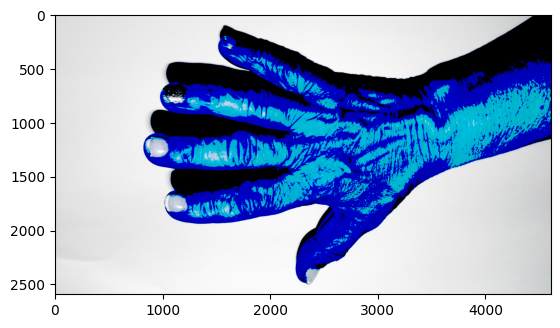

In [ ]:
num = random.randint(1, len(dataset)+1)
# print(num)
img = dataset[90]
img = cv.imread(img)
cv.imwrite('original.JPG', img)
height = 260
width = 460

# Resize the image
resized_img = cv.resize(img, (width,height), interpolation = cv.INTER_LINEAR)
cv.imwrite('resized.JPG', resized_img)

img_array = np.sum((np.asarray(img)))

img_array = img_array/(260*460)
shadow_threshold = (img_array)/12
print(shadow_threshold)
shadow_threshold = 170



x = img >= shadow_threshold

plt.imshow(x*img)

In [ ]:
import cv2 as cv
def shadow_removal(img):
    for row in range(len(img)):
        for cell in range(len(img[row])):
            result = min(abs(img[row][cell][0]-img[row][cell][2]), abs(img[row][cell][0]-img[row][cell][1]), abs(img[row][cell][1]-img[row][cell][2]))
            if result < 30:
                img[row][cell] = [0,0,0]



img = dataset[90]
img = cv.imread(img)
img = [[[0,0,0] if sum(col) < 200 else col] for row in img for col in row]
img = np.asarray(img)
# print(img)
# shadow_removal(img)
cv.imwrite('img_shadow_free.JPG', img)

False

# **Feature Exraction**

In [ ]:
def is_skin(pixel):
    b, g, r = pixel
    bgr_pixel = np.array([[[0, 0, 255]]], dtype=np.uint8) 
    y,cr,cb = cv.split(cv.cvtColor(bgr_pixel, cv.COLOR_BGR2YCrCb))
    if (r > 95 and g >40 and b>20 and r>g and r>b and abs(r-g) >15 and cr >135 and cb>85 and y >80):
        return True
    return False 



#     R > 95 and G > 40 and B > 20 and R > G and R > B
# and | R - G | > 15 and A > 15 and Cr > 135 and
# Cb > 85 and Y > 80

In [ ]:
center = (250, 150)
radius = 5

height = 260
width = 460
img = dataset[90]
img = cv.imread(img)

def is_skin_img(img):
    img_ycrcb = cv.cvtColor(img, cv.COLOR_BGR2YCrCb)
    for row in range(len(img)):
        for cell in range(len(img[row])):
            if not is_skin(img[row][cell]):
                img[row][cell] = [0,0,0]

# Resize the image
resized_img = cv.resize(img, (width,height), interpolation = cv.INTER_LINEAR)
cv.imwrite('resized.JPG', resized_img)

# call 
is_skin_img(resized_img)
cv.imwrite('resized_is_skin.JPG', resized_img)


# # Draw a point on the image
# img_with_point = cv.circle(resized_img, center, radius, (0, 0, 255), -1)

# # Display the image with the point
# cv.imwrite('Image with Point.JPG', img_with_point)

# bgr_values = resized_img[100,100]
# img_ycrcb = cv.cvtColor(resized_img, cv.COLOR_BGR2YCrCb)
# ycrcb_values= img_ycrcb[100,100]

# print(bgr_values)
# print(ycrcb_values)

# print(is_skin(bgr_values, ycrcb_values))



True

In [ ]:
import cv2 
img = dataset[90]
img = cv.imread(img)

gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Apply Otsu's thresholding to segment the hand region
val, thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)
print(val)
cv.imwrite('thres.JPG', thresh)

194.0


True

In [ ]:
import cv2 
num = random.randint(1, len(dataset)+1)
print(num)
img = dataset[num]
img = cv.imread(img)

hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

# Define the range of skin color in HSV
lower_skin = np.array([0, 20, 70], dtype=np.uint8)
upper_skin = np.array([20, 255, 255], dtype=np.uint8)

# Threshold the image to extract the skin region
mask = cv2.inRange(hsv, lower_skin, upper_skin)

# Invert the mask to obtain the shadow region
shadow_mask = cv2.bitwise_not(mask)

# Remove small noise using morphological opening
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5, 5))
mask = cv2.morphologyEx(mask, cv2.MORPH_OPEN, kernel)
shadow_mask = cv2.morphologyEx(shadow_mask, cv2.MORPH_OPEN, kernel)

# Apply the mask to the original image to remove the shadow
result = cv2.bitwise_and(img, img, mask=mask)

cv.imwrite('result.JPG', result)

1052


True

In [ ]:
gray = cv2.cvtColor(result, cv2.COLOR_BGR2GRAY)
_, thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)
# equalized = cv.equalizeHist(gray)
edges = cv.Canny(result, 50, 200)
cv.imwrite('edges.JPG', edges)

True

In [ ]:
import cv2 
img = dataset[90]
img = cv.imread(img)

gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Apply Otsu's thresholding to segment the hand region
_, thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)

# Remove small noise using morphological opening
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5, 5))
opening = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel)

# Display the result
cv2.imwrite('Opened Image.JPG', opening)

True

In [ ]:
import cv2 
img = dataset[90]
img = cv.imread(img)

gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Apply CLAHE to equalize the illumination
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
equalized = clahe.apply(gray)
cv.imwrite('equalized.JPG', equalized)

# Apply Otsu's thresholding to segment the hand region
_, thresh = cv2.threshold(equalized, 128, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)
cv.imwrite('thresh.JPG', thresh)


True

In [ ]:
import cv2 
from scipy import ndimage as ndi
from skimage import feature

num = random.randint(1, len(dataset)+1)
print(num)
img = dataset[num]

img = cv.imread(img)

img_rgb = cv2.resize(img, (460, 260))

img_ycrcb = cv2.cvtColor(img_rgb, cv2.COLOR_BGR2YCR_CB)  # http://blog.tibarazmi.com/hand-detection-using-contour-approximation-method/
ycrcbmin = np.array((0, 133, 77))
ycrcbmax = np.array((255, 173, 127))
skin_ycrcb = cv2.inRange(img_ycrcb, ycrcbmin, ycrcbmax)
cv.imwrite('skinYCRCB.JPG', skin_ycrcb)
img_canny = cv.Canny(skin_ycrcb, 50, 200)
cv.imwrite('img_canny.JPG', img_canny)

1673


True

In [ ]:
img = dataset[1673]
img = cv.imread(img)
cv.imwrite('orginal.JPG', img)

True

1) Contour Detection

In [ ]:
def feature_extraction(processed_img):
    contours, hierarchy = cv.findContours(img, cv.RETR_TREE, cv.CHAIN_APPROX_NONE)
    img_copy = img.copy()
    img_copy = cv.drawContours(img_copy, contours, -1, (0, 255, 0), 2, 2)
    return img_copy

print(len(processed_imgs))

features = []
for img in processed_imgs:
    features.append(feature_extraction(img))


print(features[0].shape)

1310
(260, 460)


2) Blob Detection

3) Histogram of Oriented Gradients

# **Image Augmentation**

In [ ]:
#cropping image to extract the hand region
# Convert the image to grayscale
img = cv.imread(train_imgs[0])
cv.imwrite('original.JPG', img)

gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

# Apply a threshold to the grayscale image
_, thresh = cv.threshold(gray, 55, 255, cv.THRESH_BINARY_INV + cv.THRESH_OTSU)

# Apply morphological operations to the thresholded image
kernel = cv.getStructuringElement(cv.MORPH_ELLIPSE, (5, 5))
thresh = cv.erode(thresh, kernel, iterations=1)
thresh = cv.dilate(thresh, kernel, iterations=1)

# Find the contours in the thresholded image
contours, _ = cv.findContours(thresh, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)

# Select the contour(s) that correspond to the hand
hand_contours = []
for contour in contours:
    area = cv.contourArea(contour)
    hand_contours.append(contour)

# Find the bounding rectangle for the selected contour(s)
x, y, w, h = cv.boundingRect(hand_contours[0])

# Extract the region of interest (ROI) from the original image
roi = img[y:y+h, x:x+w]

# Display the ROI
cv.imwrite('ROI.JPG', roi)

True

In [ ]:
# now we have train_imgs and train_labels
imgs=[]
# for img in train_imgs:
img = cv.imread(train_imgs[1])
print(f'height before resizing : {img.shape[0]}, width before resizing: {img.shape[1]}')

height = 260
width = 460

resized_img = cv.resize(img, (width,height), interpolation = cv.INTER_LINEAR)
print(f'height before resizing : {resized_img.shape[0]}, width before resizing: {resized_img.shape[1]}')

gray_scale = cv.cvtColor(resized_img, cv.COLOR_BGR2GRAY)

cv.imwrite('original.JPG', img)
cv.imwrite('resized.JPG', resized_img)
cv.imwrite('grayscale.JPG', gray_scale)

height before resizing : 2592, width before resizing: 4608
height before resizing : 260, width before resizing: 460


True

In [ ]:
# A common skin color threshold in the YCbCr space is 77 <= Cr <= 127 and 133 <= Cb <= 173.

img_ycrcb = cv.cvtColor(img, cv.COLOR_BGR2YCrCb)
cv.imwrite('intermediate.JPG', img_ycrcb)
lower_skin = np.array([0, 135, 85])
upper_skin = np.array([255, 180, 135])
# Create a binary mask of the skin color in the YCrCb color space according to a range of pixels
mask = cv.inRange(img_ycrcb, lower_skin, upper_skin)
# 
kernel = cv.getStructuringElement(cv.MORPH_ELLIPSE, (5, 5))
mask = cv.morphologyEx(mask, cv.MORPH_OPEN, kernel)
# save the mask image
cv.imwrite('mask.JPG', mask)

contours, hierarchy = cv.findContours(mask, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)
contour_sizes = [(cv.contourArea(contour), contour) for contour in contours]
hand_contour = max(contour_sizes, key=lambda x: x[0])[1]

# Extract the hand region
x, y, w, h = cv.boundingRect(hand_contour)
hand_region = img[y:y+h, x:x+w]

# Display the hand region
cv.imwrite('Hand Region.JPG', hand_region)

True

# Ay Model Zeft

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

train_imgs_model = np.asarray(processed_imgs)
shape = train_imgs_model.shape
print(shape)
train_imgs_model = train_imgs_model.reshape((shape[0],shape[1]*shape[2]))
print(train_imgs_model[0].shape)

(1310, 260, 460)
(119600,)


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=6)
neigh.fit(train_imgs_model, train_labels)


KNeighborsClassifier(n_neighbors=6)

In [ ]:
test = 600
num = random.randint(1, len(dataset)+1)
img = dataset[num]
label = img.split('/')[4]
label = np.asarray(label)
print(img)
image_original = cv.imread(img)
cv.imwrite('original.JPG', image_original)
preprocessed_image = preprocessing(img)
cv.imwrite('pre1.JPG', preprocessed_image)

pred = neigh.predict(preprocessed_image.reshape(1,(shape[1]*shape[2])))
print(pred)
print(pred == label)

/content/dataset/men/5/5_men (63).JPG
['4']
[False]


In [ ]:
print(validation_imgs[32])

/content/dataset/men/4/4_men (49).JPG


In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(pred, train_labels[400:600])

array([[ 2,  1,  1,  3,  0,  1],
       [20, 38, 36, 35, 34, 29],
       [ 0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0]])

In [ ]:
print(sum([int(train_label) > 1 for train_label in pred]))

0
